# <center>MDSA D206 Data Cleaning</center> 



## <center>WGU</center>




# Part I:  Research Question

### A.  Description of Question

What factors, if any, can be used to predict a customers churn?


### B.  Description of all variables within data set with data type and example.

In order to look at all vairables we first need to setup our environment.  First we will import any packages needed.


In [85]:
# package imports
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns
import scipy.stats as stats
import random

### Data Frame Setup

We then setup our data frame from the data set provided using the pd.read_csv function from pandas.




In [86]:
# code for data frame
churn = pd.read_csv("C:/users/jjord/Documents/WGU/D206/PA/churn_raw_data.csv")

After we have imported our CSV into our data frame, we can then use the .info() function to get our variable info.  This info will include variable name, counts and data types. 

In [87]:
# Profile of Data Frame
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

# Part II: Data-Cleaning Plan

### C.  Explanation of Plan for Data Cleaning

1.  Python will used to asses the quality of the data within the data set.  The data set will first be checked for duplicate records.  If any dulpicates are found using the .duplicated() function, they will be removed from the data set.  Once we have dealt with any duplicates, we will move on to identifiying any missing data within the data set.  In order to determine if there are any missing values, we will use the .isnull().sum() function.  This function will return the column names within the data set as well as a count of any missing values for each column.  Once we have determined any missing values, we will use the msno.matrix() function to visualize the missing values.  We will then visualize each column that has any missing values individually.  To do this, we will use the plt.hist() function.  This function will create a histogram so we can better examine the missing values.  This method can only be used on quantitative data types.  For qualitative data types with missing values, we will use the value_counts() function.  

Once we have identified any missing values, we can then determine the proper way to treat them.  Treatment methods that will be considered are deletion and imputation.  Deletion includes removing either variables(columns) or observations(rows).  Deletion will only be used if a variable is missing beyond 60% of its data or an observation is 5% or less.(Middleton, 2023)  Imputation includes using Univariate statistical imputation, backward/forward fill, multiple imputation by chained equations or K-nearest neighbor.(Middleton, 2023)  Imputation will replace a missing value with a substitute value from the data set.  Once we visualize any missing data, we can then determine which method we will use to treat the missing data.  

After missing values have been treated, we can then look for any outliers within the data frame.  To visualize any outliers we will be using Seaborn and the .boxplot() function.  Once we have determined if any outliers exsist, we can treat them.  Treatment methods include imputation, retention, exclusion and removal.  Each  method has their advantages and disadvantages and will be taken into consideration when examining any outliers. Outliers will only be detected on numeric data types. 

Finally, PCA will be performed on any numerical variables within the data set. 

2.  CLeaning data is the most important part of data analysis.  When using the methods above to clean the data, we can ensure that our analysis and conclusion of the data are accurate.  Missing values and outliers can greatly effect outcomes and possibly lead to misinfomation given to the business.  By using different techniques and visualizations, we can determine the best way to clean the data so the business has an accurate representation.  Multiple treatment methods are mentioned above but not all will be used.  Once we get a better understanding of the data at hand, we can then choose the best method for treatment.  

3.  We will be using Python as the programming language for the data cleaning process.  Python is a widely used language in data analysis.  JupyterNotebook will be used as well.  It will allow us to combine the use of mardown and code cells into one file.  We will also be using certain libraries within Python.  Those libraries include Pandas, Numpy, Matplotlib, Missingno, Seaborn and sklearn.  Pandas will be used to import the data set into a data frame.  Numpy will be used for any array's needed.  Matplotlib and Seaborn will be used for visualization.  Missingno will be used for detecting missing values and visualization.  Sklearn will be used for the PCA.  

4.  The following section will include the code with comments of what the code does and well as the output of the code.



In [88]:
with pd.option_context("display.max_columns", 40):
    print(churn.describe(include=[np.number]))

        Unnamed: 0    CaseOrder           Zip           Lat           Lng  \
count  10000.00000  10000.00000  10000.000000  10000.000000  10000.000000   
mean    5000.50000   5000.50000  49153.319600     38.757567    -90.782536   
std     2886.89568   2886.89568  27532.196108      5.437389     15.156142   
min        1.00000      1.00000    601.000000     17.966120   -171.688150   
25%     2500.75000   2500.75000  26292.500000     35.341828    -97.082812   
50%     5000.50000   5000.50000  48869.500000     39.395800    -87.918800   
75%     7500.25000   7500.25000  71866.500000     42.106908    -80.088745   
max    10000.00000  10000.00000  99929.000000     70.640660    -65.667850   

          Population     Children          Age         Income  \
count   10000.000000  7505.000000  7525.000000    7510.000000   
mean     9756.562400     2.095936    53.275748   39936.762226   
std     14432.698671     2.154758    20.753928   28358.469482   
min         0.000000     0.000000    18.000000

In [89]:
# Duplicate Detection
# False means no duplicate
churn.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [90]:
# how many duplicates
print(churn.duplicated().value_counts())

False    10000
Name: count, dtype: int64


We can see from the above code that no duplicates were found within the data. 



Next we will look at any missing values.

In [91]:
# Missing values using isnull
churn.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

The above code shows missing values detected in the following columns:  Children, Age, Income, Techie, InternetService, Phone, TechSupport, Tenure and Bandwidth_GB_Year

 

We will now use missingno to visualize each column that contains missing values. 

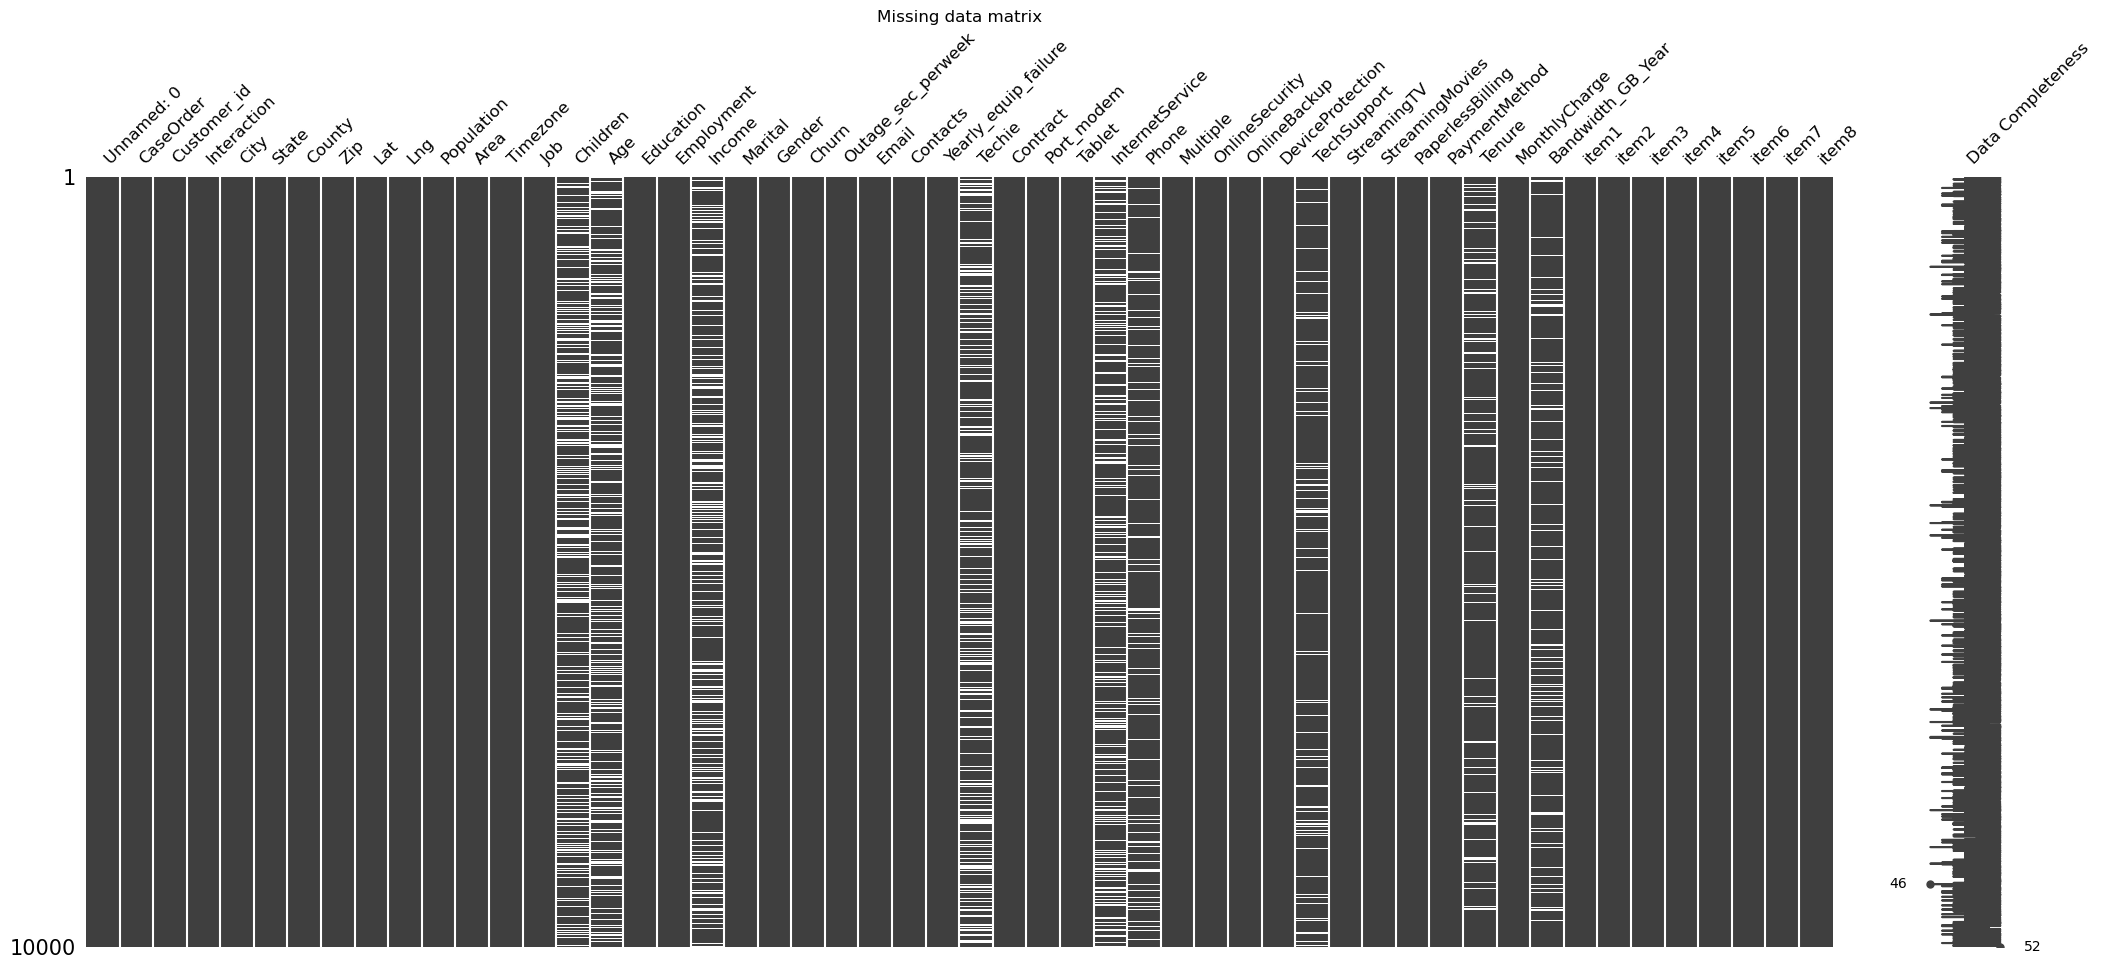

In [92]:
# Visulazation of missing values using missingno
msno.matrix(churn, fontsize=12, labels=True)
plt.title("Missing data matrix")
plt.show()

We will now look at unquie values within each column

In [93]:
for col in churn:
    print(col)
    print(churn[col].unique())

Unnamed: 0
[    1     2     3 ...  9998  9999 10000]
CaseOrder
[    1     2     3 ...  9998  9999 10000]
Customer_id
['K409198' 'S120509' 'K191035' ... 'I243405' 'I641617' 'T38070']
Interaction
['aa90260b-4141-4a24-8e36-b04ce1f4f77b'
 'fb76459f-c047-4a9d-8af9-e0f7d4ac2524'
 '344d114c-3736-4be5-98f7-c72c281e2d35' ...
 'e8307ddf-9a01-4fff-bc59-4742e03fd24f'
 '3775ccfc-0052-4107-81ae-9657f81ecdf3'
 '9de5fb6e-bd33-4995-aec8-f01d0172a499']
City
['Point Baker' 'West Branch' 'Yamhill' ... 'Haubstadt' 'West Kill'
 'Clarkesville']
State
['AK' 'MI' 'OR' 'CA' 'TX' 'GA' 'TN' 'OK' 'FL' 'OH' 'PA' 'PR' 'IA' 'ME'
 'IL' 'WI' 'NC' 'AL' 'NM' 'VT' 'MD' 'NY' 'WA' 'CT' 'NJ' 'DC' 'ND' 'LA'
 'NE' 'WV' 'AZ' 'MO' 'WY' 'MT' 'VA' 'KY' 'MN' 'KS' 'MA' 'IN' 'SC' 'NH'
 'DE' 'MS' 'ID' 'AR' 'SD' 'CO' 'HI' 'UT' 'RI' 'NV']
County
['Prince of Wales-Hyder' 'Ogemaw' 'Yamhill' ... 'Billings' 'Haralson'
 'Briscoe']
Zip
[99927 48661 97148 ...  5758 37042 30523]
Lat
[56.251   44.32893 45.35589 ... 43.43391 36.56907 34.70783]
Ln

Below, we will check to see what percentage of each column is missing to determine treatment method.  

In [94]:
# percentage of missing
churn.isnull().mean() * 100

Unnamed: 0               0.00
CaseOrder                0.00
Customer_id              0.00
Interaction              0.00
City                     0.00
State                    0.00
County                   0.00
Zip                      0.00
Lat                      0.00
Lng                      0.00
Population               0.00
Area                     0.00
Timezone                 0.00
Job                      0.00
Children                24.95
Age                     24.75
Education                0.00
Employment               0.00
Income                  24.90
Marital                  0.00
Gender                   0.00
Churn                    0.00
Outage_sec_perweek       0.00
Email                    0.00
Contacts                 0.00
Yearly_equip_failure     0.00
Techie                  24.77
Contract                 0.00
Port_modem               0.00
Tablet                   0.00
InternetService         21.29
Phone                   10.26
Multiple                 0.00
OnlineSecu

Since none of the columns are within the threshold for deleteion, that will not be an option for treatment.  

We will now use the plt.hist() function to visualize each columns missing valued on a histogram. This will help determine which method of imputation we will use to clean the missing values. 

Note, for columns that are not numerical will not use plt.hist() function.  

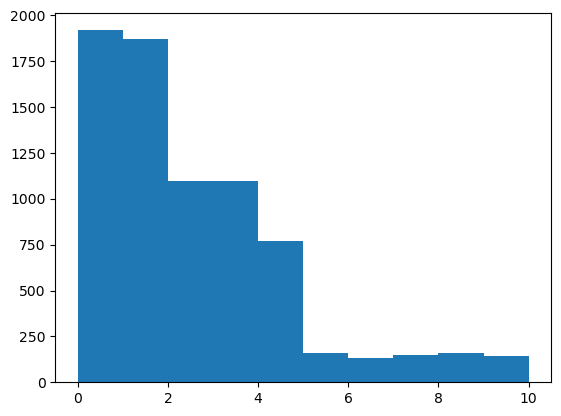

In [95]:
# distribution examanation of Children column
plt.hist(churn["Children"])
plt.show()

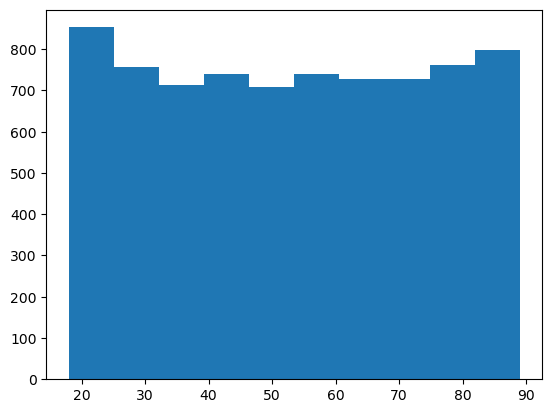

In [96]:
# distribution examination of Age column
plt.hist(churn["Age"])
plt.show()

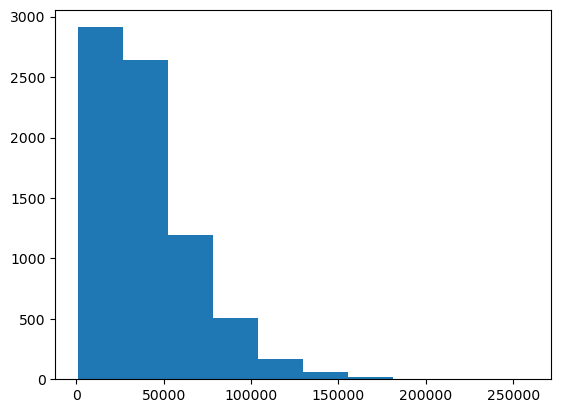

In [97]:
# distribution examination of Income column
plt.hist(churn["Income"])
plt.show()

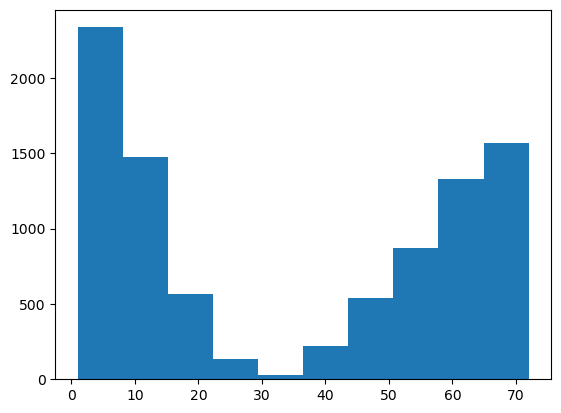

In [98]:
# distribution examination of Tenure column
plt.hist(churn["Tenure"])
plt.show()

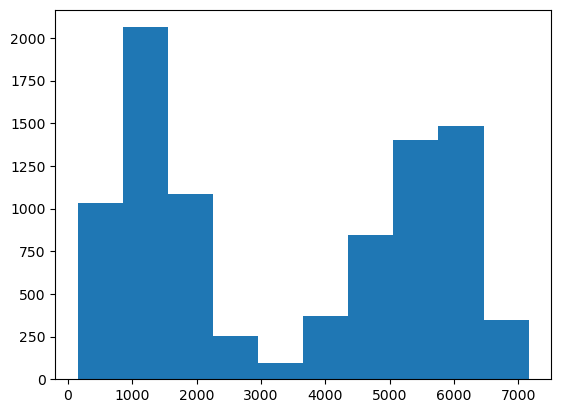

In [99]:
# distribution examination of Bandwidth_GB_Year column
plt.hist(churn["Bandwidth_GB_Year"])
plt.show()

In [100]:
# look at unique values for Techie
churn.Techie.unique()

array(['No', 'Yes', nan], dtype=object)

In [101]:
# look at values in Techie
churn.Techie.value_counts()

Techie
No     6266
Yes    1257
Name: count, dtype: int64

In [102]:
# look at unique values for InternetService
churn.InternetService.unique()

array(['Fiber Optic', 'DSL', nan], dtype=object)

In [103]:
# look at values in InternetService
churn.InternetService.value_counts()

InternetService
Fiber Optic    4408
DSL            3463
Name: count, dtype: int64

In [104]:
# look at values in Phone
churn.Phone.value_counts()

Phone
Yes    8128
No      846
Name: count, dtype: int64

In [105]:
# look at values in TechSupport
churn.TechSupport.value_counts()

TechSupport
No     5635
Yes    3374
Name: count, dtype: int64

Detection of outliers

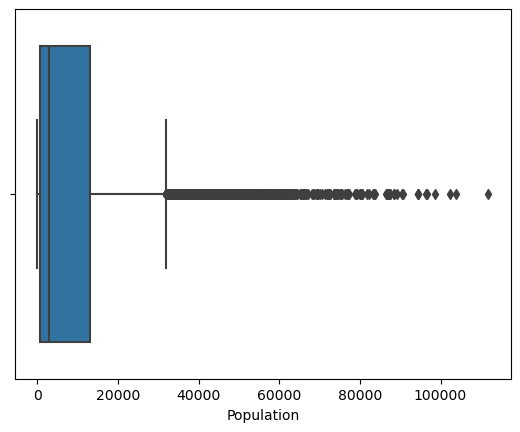

In [106]:
boxplot = sns.boxplot(x="Population", data=churn)

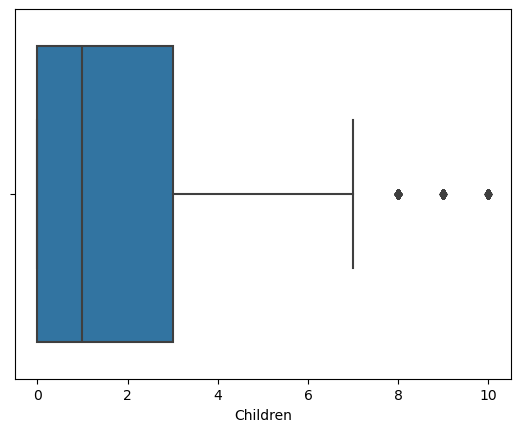

In [107]:
boxplot = sns.boxplot(x="Children", data=churn)

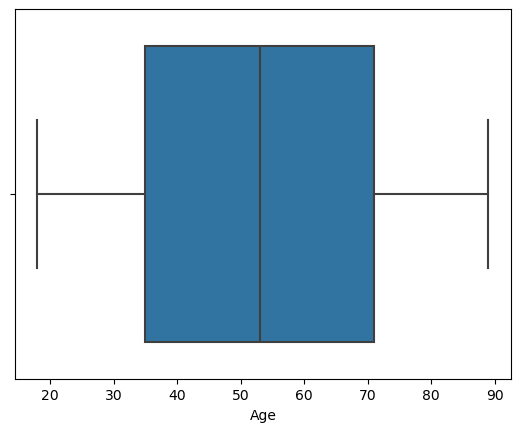

In [108]:
boxplot = sns.boxplot(x="Age", data=churn)

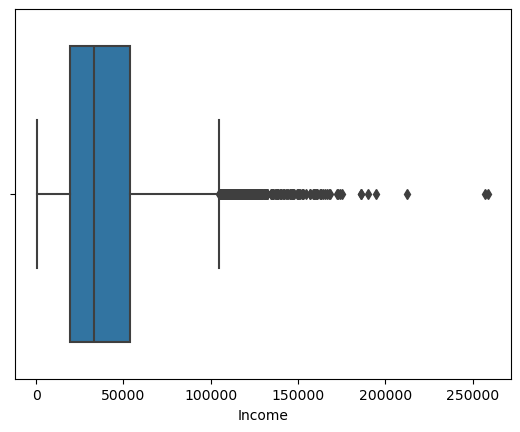

In [109]:
boxplot = sns.boxplot(x="Income", data=churn)

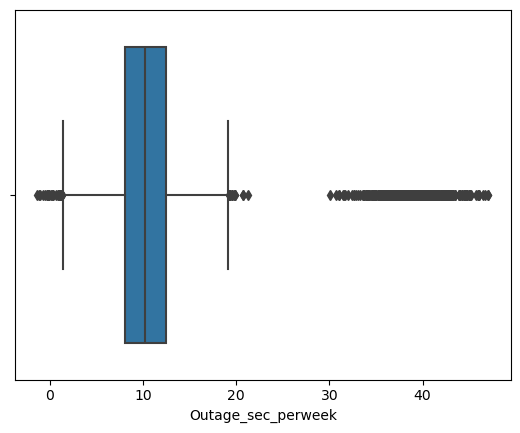

In [110]:
boxplot = sns.boxplot(x="Outage_sec_perweek", data=churn)

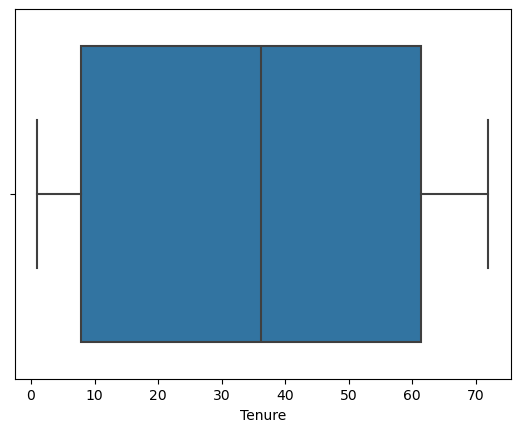

In [111]:
boxplot = sns.boxplot(x="Tenure", data=churn)

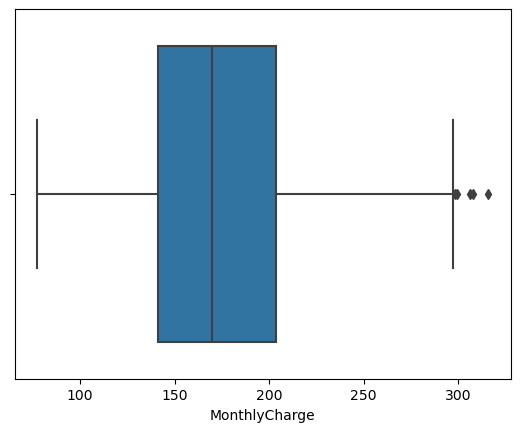

In [112]:
boxplot = sns.boxplot(x="MonthlyCharge", data=churn)

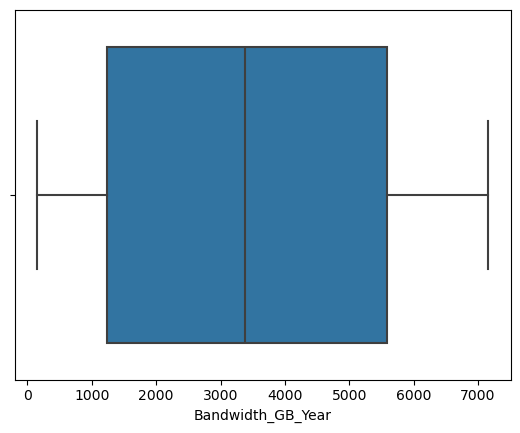

In [113]:
boxplot = sns.boxplot(x="Bandwidth_GB_Year", data=churn)

Further exploration

In [114]:
churn.Population.describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [115]:
churn.Children.describe()

count    7505.000000
mean        2.095936
std         2.154758
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64

In [116]:
churn.Age.describe()

count    7525.000000
mean       53.275748
std        20.753928
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

In [117]:
churn.Income.describe()

count      7510.000000
mean      39936.762226
std       28358.469482
min         740.660000
25%       19285.522500
50%       33186.785000
75%       53472.395000
max      258900.700000
Name: Income, dtype: float64

In [118]:
churn.Outage_sec_perweek.describe()

count    10000.000000
mean        11.452955
std          7.025921
min         -1.348571
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: Outage_sec_perweek, dtype: float64

In [119]:
churn.Tenure.describe()

count    9069.000000
mean       34.498858
std        26.438904
min         1.000259
25%         7.890442
50%        36.196030
75%        61.426670
max        71.999280
Name: Tenure, dtype: float64

In [120]:
churn.MonthlyCharge.describe()

count    10000.000000
mean       174.076305
std         43.335473
min         77.505230
25%        141.071078
50%        169.915400
75%        203.777441
max        315.878600
Name: MonthlyCharge, dtype: float64

In [121]:
churn.Bandwidth_GB_Year.describe()

count    8979.000000
mean     3398.842752
std      2187.396807
min       155.506715
25%      1234.110529
50%      3382.424000
75%      5587.096500
max      7158.982000
Name: Bandwidth_GB_Year, dtype: float64



# Part III:  Data Cleaning

### D.  Data Cleaning Process
1. Description of findings from data cleaning plan(Part C) 
    -  Columns Zip, Lat, Lng currently are floats or ints.  There are not quantitative so will change datatype to object.
    -  Outage_sec_perweek has negative numbers in it.  There should not be negative time for an outage.  Imputation will be used.
    -  Education column could be standardized.  
    -  Survey item columns to be renamed based on data dictionary
    -  First column is not named and matches CaseOrder.  Drop first column and re-index
    -  Numerical columns missing values.  Children, Age, Income, Tenure & Bandwidth_GB_Year.  Imputation will be used to deal with missing data.  Type of imputation will be based on column data.  
    - Categorical columns missing values.  Techie, Phone, TechSupport, InternetService
    

2.  Imputation method will be based on variable type as stated above for numerical columns missing values.  
    -  Categorical columns Techie, Phone and TechSupport will be set to 'No' as that is normally the default value. InternetService will be set to 'No Internet Service' instead of none or nan.  
    -  Outliers identified will not be treated at this time.  Most of the outliers are on columns that seem to be reported by the customer and there is not a good way to infer the values.  Outage_sec_perweek is the only exception and will be treated with the appropriate imputation method.  


Each step in the cleaning process will include a justification and summary to satisfy parts D3 & D4 of the rubric.

A copy of the data set will be made in order to preserve the original data set.  

In [122]:
# copy of data set
churn_clean = churn.copy()

In [123]:
# inspect copy
churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [124]:
churn_clean.shape

(10000, 52)

In [125]:
churn_clean.columns

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')

Columns Zip, Lat, Lng currently are floats or ints.  There are not quantitative so will change datatype to object.  These values are not meant for any type of calculation.  Since the rest of the data types for categorical are set to object, these will aslo.

In [126]:
obj_columns = ["Zip", "Lat", "Lng"]
churn_clean[obj_columns] = churn_clean[obj_columns].astype(object)

In [127]:
# inspect copy after type change
churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  object 
 8   Lat                   10000 non-null  object 
 9   Lng                   10000 non-null  object 
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

Outage_sec_perweek has negative numbers in it.  There should not be negative time for an outage.  We are going to change the negative numbers to 0.  

In [128]:
# descriptive stats for Outage_sec_perweek
churn_clean["Outage_sec_perweek"].describe()

count    10000.000000
mean        11.452955
std          7.025921
min         -1.348571
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: Outage_sec_perweek, dtype: float64

In [129]:
# will use .shape to determine how many negative values
churn_clean[churn_clean["Outage_sec_perweek"] < 0].shape

(11, 52)

In [130]:
# 11 values are negative.  Will set them to 0 instead of deleting them.  Deleting them would cause more data loss.
churn_clean["Outage_sec_perweek"][churn_clean["Outage_sec_perweek"] < 0] = 0

C:\Users\jjord\AppData\Local\Temp\ipykernel_15200\628072134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_clean["Outage_sec_perweek"][churn_clean["Outage_sec_perweek"] < 0] = 0


In [131]:
# verify with descriptive stats for Outage_sec_perweek
# min should be 0 now
churn_clean["Outage_sec_perweek"].describe()

count    10000.000000
mean        11.453592
std          7.024842
min          0.000000
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: Outage_sec_perweek, dtype: float64

Education column could be standardized.  Will create a dictionary to standardize values in the Education column as the current values are too granular. 

In [132]:
# Education current value counts
churn_clean["Education"].value_counts()

Education
Regular High School Diploma                 2421
Bachelor's Degree                           1703
Some College, 1 or More Years, No Degree    1562
9th Grade to 12th Grade, No Diploma          870
Master's Degree                              764
Associate's Degree                           760
Some College, Less than 1 Year               652
Nursery School to 8th Grade                  449
GED or Alternative Credential                387
Professional School Degree                   198
No Schooling Completed                       118
Doctorate Degree                             116
Name: count, dtype: int64

In [133]:
# create dictionary mapping
education_levels = {
    "Master's Degree": "Graduate Degree",
    "Regular High School Diploma": "Highschool",
    "Doctorate Degree": "Graduate Degree",
    "No Schooling Completed": "No Diploma",
    "Associate's Degree": "Associate's/Some College",
    "Bachelor's Degree": "Bachelor's Degree",
    "Some College, Less than 1 Year": "Associate's/Some College",
    "GED or Alternative Credential": "Graduate Degree",
    "Some College, 1 or More Years, No Degree": "Associate's/Some College",
    "9th Grade to 12th Grade, No Diploma": "No Diploma",
    "Nursery School to 8th Grade": "No Diploma",
    "Professional School Degree": "Graduate Degree",
}
# map to dictionary
churn_clean["Education"] = churn_clean["Education"].map(education_levels)

In [134]:
# Education value counts after mapping
churn_clean["Education"].value_counts()

Education
Associate's/Some College    2974
Highschool                  2421
Bachelor's Degree           1703
Graduate Degree             1465
No Diploma                  1437
Name: count, dtype: int64

Survey item columns to be renamed based on data dictionary.

In [135]:
# rename item columns
churn_clean.rename(
    columns={
        "item1": "Timely_response",
        "item2": "Timely_fixes",
        "item3": "Timely_replacements",
        "item4": "Reliability",
        "item5": "Options",
        "item6": "Respectful_response",
        "item7": "Courteous_exchange",
        "item8": "Active_listening",
    },
    inplace=True,
)

In [136]:
# verify columns after rename
churn_clean.columns

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_response', 'Timely_fixes',
       'Timely_replacements', 'Reliability', 'Options', 'Respectful_response',
       'Courteous_exchange', 'Active_listening'],
      dtype='object')

First column is not named and matches CaseOrder.  Drop first column and re-index will ensure correct indexing.  

In [137]:
churn_clean.iloc[:, 0:1].head()

,Unnamed: 0
0,1
1,2
2,3
3,4
4,5


In [138]:
# inplace drop of column
churn_clean.drop(churn_clean.columns[0], axis=1, inplace=True)

In [139]:
# index reset
churn_clean = churn_clean.reset_index(drop=True)
churn_clean.set_index("CaseOrder", inplace=True)

In [140]:
# verify after column drop and re-index
churn_clean.head()

,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,...,MonthlyCharge,Bandwidth_GB_Year,Timely_response,Timely_fixes,Timely_replacements,Reliability,Options,Respectful_response,Courteous_exchange,Active_listening
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,38,Urban,...,171.449762,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.2408,10446,Urban,...,242.948015,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,...,150.761216,271.493436,4,4,4,3,4,4,4,5


Numerical columns missing values.  Children, Age, Income, Tenure & Bandwidth_GB_Year.  Imputation will be used to deal with missing data.  Type of imputation will be based on column data.

In [141]:
# create list of numeric columns
numeric_col = ["Children", "Age", "Income", "Tenure", "Bandwidth_GB_Year"]

In [142]:
# descriptive stats for numeric_col
churn_clean[numeric_col].describe()

,Children,Age,Income,Tenure,Bandwidth_GB_Year
count,7505.000000,7525.000000,7510.000000,9069.000000,8979.000000
mean,2.095936,53.275748,39936.762226,34.498858,3398.842752
std,2.154758,20.753928,28358.469482,26.438904,2187.396807
min,0.000000,18.000000,740.660000,1.000259,155.506715
25%,0.000000,35.000000,19285.522500,7.890442,1234.110529
50%,1.000000,53.000000,33186.785000,36.196030,3382.424000
75%,3.000000,71.000000,53472.395000,61.426670,5587.096500
max,10.000000,89.000000,258900.700000,71.999280,7158.982000


c:\Users\jjord\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jjord\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jjord\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jjord\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

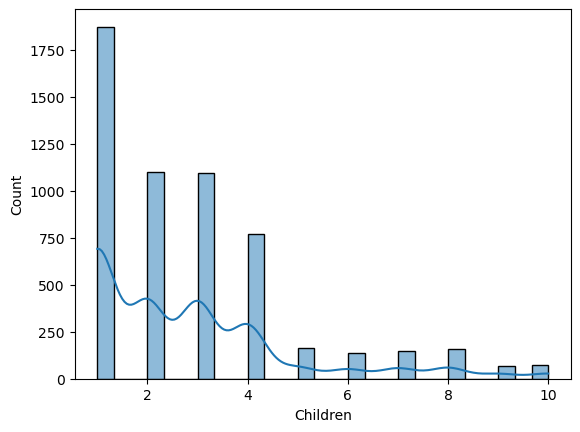

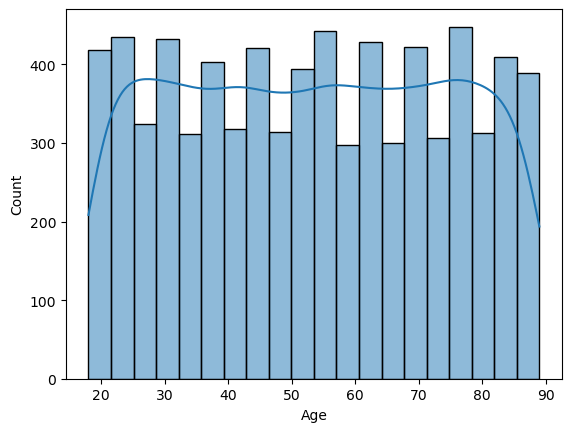

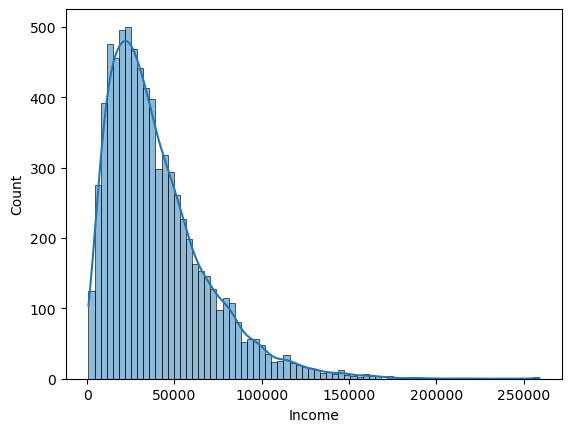

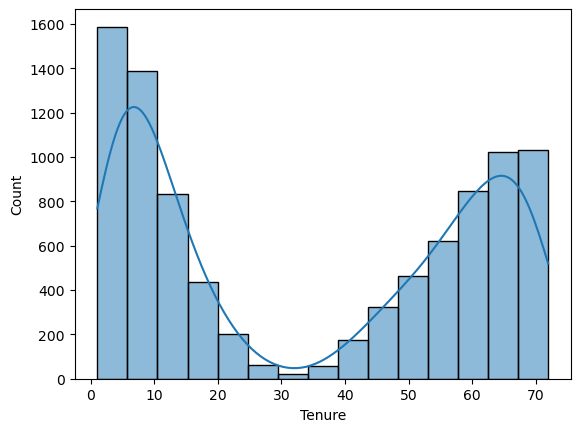

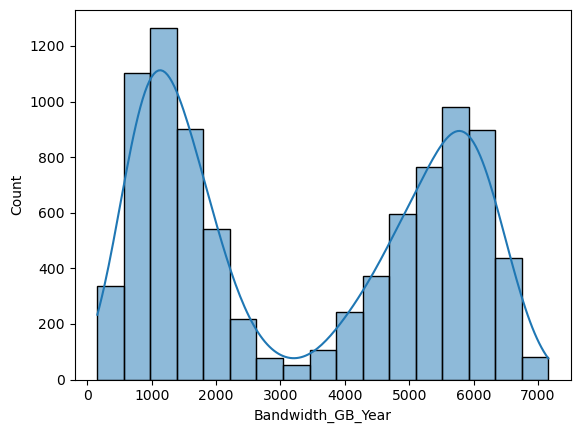

In [143]:
# histogram visualizations
for n, col in enumerate(churn[numeric_col]):
    try:
        plt.figure(n)
        sns.histplot(churn[col][churn[col] > 0], kde=True)
    except Exception:
        pass

Income and Children have distributions that are skewed normal.  Skewed distributions should be imputed with the median function to reduce variance(Middleton, 2023)

In [144]:
# create list for imputation
median_col = ["Income", "Children"]
# impute null values
for col in median_col:
    churn_clean[col].fillna(churn_clean[col].median(), inplace=True)

In [145]:
# verify Income and Children no longer have null values
churn_clean[median_col].isnull().sum()

Income      0
Children    0
dtype: int64

Age has a distribution that is even.  Since the size of the data is fairly large and there is no real way of knowing age, we will use random imputation.

In [146]:
# set random seed
random.seed(36297)

# create list of current ages
ages_current = churn_clean["Age"][churn_clean["Age"].notna()].tolist()

In [147]:
# asign ages at random
churn_clean["Age"].fillna(
    pd.Series(np.random.choice(ages_current, size=len(churn_clean.index))), inplace=True
)

In [148]:
# verify Age no longer has nulls
churn_clean["Age"].isnull().sum()

0

Tenure and Bandwidth_GB_Year have a distribution that is bimodal.  Since the size of the data is fairly large, we will use random imputation.

In [149]:
# create list of Tenure and Bandwidth_GB_Year
bimod_col = ["Tenure", "Bandwidth_GB_Year"]

In [150]:
for col in bimod_col:
    churn_clean[col].fillna(
        pd.Series(
            np.random.choice(
                churn_clean[col][churn_clean[col] >
                                 0], size=len(churn_clean.index)
            )
        ),
        inplace=True,
    )

In [151]:
# verify Tenure and Bandwidth_GB_Year no longer have null
churn_clean[bimod_col].isnull().sum()

Tenure               0
Bandwidth_GB_Year    0
dtype: int64

Categorical columns Techie, Phone and TechSupport will be set to 'No' as that is normally the default value. InternetService will be set to 'No Internet Service' instead of none or nan. 

In [152]:
# create list for Techie, Phone and TechSupport
catnulls = ["Techie", "Phone", "TechSupport"]

In [153]:
# Impute nulls for Techie, Phone and TechSupport
for col in catnulls:
    churn_clean[col].fillna("No", inplace=True)

In [154]:
# verify no nulls for Techie, Phone and TechSupport
churn_clean[catnulls].isnull().sum()

Techie         0
Phone          0
TechSupport    0
dtype: int64

In [155]:
# Impute nulls for InternetService
churn_clean["InternetService"].fillna("No Internet Service", inplace=True)

In [156]:
# verify InternetService no longer has nulls
churn_clean["InternetService"].isnull().sum()

0

In [157]:
# export clean copy
churn_clean.to_csv("churn_clean.csv")

### D. Continued

6.  Summary of limitations of the data cleaning process.

    Most of the limitations arise from issues with the data source itself.  Columns such as Education and income rely on the accuracy of the customer input which makes it difficult as human error comes into play.  Also, its suggested that if columns such as these are going to be used for the purpose of analysis, the company should mark them as required.  This will greatly reduce the number of null values within the data set.  The process of data cleaning requires significant amounts of time and resources to properly identify missing values and clean data(Larose & Larose, 2019).  There is no one-size-fits-all method for cleaning data since every data set is different. Imputation and the removal of outliers also have thier limitations.  Imputation for replacing missing values can cause distortion or distribution issues within the data(Larose & Larose, 2019).  Outlier removal can also significantly reduce the sample size of the data.      

7.  Discuss how the limitations summarized in part D6 could affect the analysis of the question or decision from part A.

    With the limitations discussed above, it is possible the analysis of the data set could lead to false predictions.  It is also possible that accuracy could be questioned as well.  Human error can play a large part of that due to so many columns being entered by the customer which could lead to more inconsistencies within the data.  With a couple of the columns missing more than 20% of their data, it is possible that the imputation techniques introduced bias.  All of these should be taken into consideration in regards to the question from part A.  


### PCA
1.  PCA is based on an orthogonal mathematical concept that converts a set of observations of possibly correlated variables into a set called principal components(Middleton, 2023).  It involves the process of finding linear combinations of variables taht best explain the connection among variables(Middleton, 2023).  PCA can only  be completed with quantitative continuous variables. 

Below will be the process and code for PCA including normalization of the variables used.  Variables used will include: ['Tenure', 'Contacts', 'Outage_sec_perweek', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year']

In [158]:
# copy of clean data set
churn_scaled = churn_clean.copy()

In [159]:
# columns for PCA
cc = churn_scaled[
    [
        "Tenure",
        "Contacts",
        "Outage_sec_perweek",
        "Yearly_equip_failure",
        "MonthlyCharge",
        "Bandwidth_GB_Year",
    ]
]

In [160]:
# normalization
churn_norm = (cc - cc.mean()) / cc.std()

In [161]:
pca = PCA(n_components=cc.shape[1])

In [162]:
pca.fit(churn_norm)

PCA(n_components=6)

In [163]:
churn_pca = pd.DataFrame(
    pca.transform(churn_norm), columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"]
)

In [164]:
# pca loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"],
    index=cc.columns,
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Tenure,0.705093,-0.062149,0.001288,-0.004969,0.037895,0.705351
Contacts,-0.000792,0.004832,-0.677791,0.734910,0.020980,0.006506
Outage_sec_perweek,0.024033,0.706608,0.039253,0.011425,0.706014,0.000313
Yearly_equip_failure,0.013539,0.063653,0.727171,0.673532,-0.115497,0.001698
MonthlyCharge,0.047530,0.701897,-0.100839,-0.078115,-0.697257,0.051426
Bandwidth_GB_Year,0.706982,-0.010439,-0.010524,-0.002255,-0.012683,-0.706959


2.  Justify the reduced number of the principal components and include a screenshot of a scree plot.  Explanation of the reduced number of principal components will be below code and visualzation.  

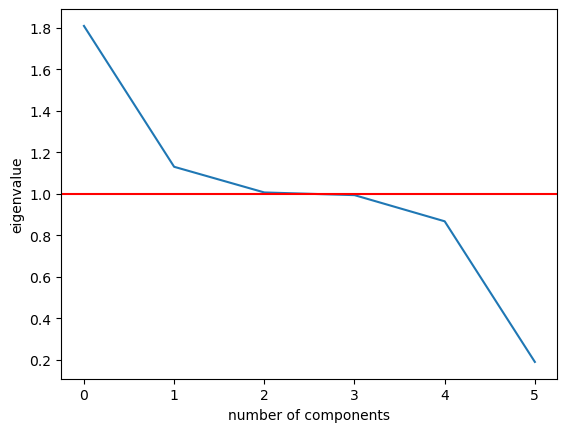

In [165]:
# PC selection and visualization
cov_matrix = np.dot(churn_norm.T, churn_norm) / cc.shape[0]
eigenvalues = [
    np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector))
    for eigenvector in pca.components_
]
plt.plot(eigenvalues)
plt.xlabel("number of components")
plt.ylabel("eigenvalue")
plt.axhline(y=1, color="red")
plt.show()

According to the Kaiser Rule, the number of components to retain from PCA is equal to the number of eigenvalues greater than one.   An eigenvalue greater than one suggests that the corresponding principal component captures meaningful information from the data.  The larger the PCA the more significant it is in explaining variations in the dataset(Lacrose & Lacrose, 2019).  As we can see from the scree plot above PC's 0,1 & 2 are above the eigenvalue of 1 so they should be kept.  

3.  PCA Benefits

When PCA is performed, patterns in the data are identified and variables are grouped based on the relationship that exists among them(Middleton, 2023).  PCA can also reduce the dimensionality of a data set making interpretation and visualization less complex.  By making it less complex, it also reduces time and resources needed for analysis without sacrificing information in the variable.

# Part IV.  Supporting Documents

### F. Panopto Video Link



###  Sources and References

Middleton, Dr. K. (2023). Getting Started with D206 Missing Values [Review of Getting Started with D206 Missing Values]. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=5cb19ab2-993f-4d04-af47-b07d011b3916


Middleton, Dr. K. (2023). Getting Started with D206 Data Cleaning Essentials [Review of Getting Started with D206 Data Cleaning Essentials]. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=cf0de116-4cdf-4306-9284-b07d00ee8fcb


Middleton, Dr. K. (2023). D206 - Getting Started with D206 Outliers [Review of D206 - Getting Started with D206 Outliers]. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=d2ce42e1-c2db-4e67-99bc-b07d00ee8bf0


Middleton, Dr. K. (2023). D206 - Getting Started with D206 Missing Values [Review of D206 - Getting Started with D206 Missing Values]. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=5cb19ab2-993f-4d04-af47-b07d011b3916

‌‌
Middleton, Dr. K. (2023). Getting Started with D206 PCA [Review of Getting Started with D206 PCA]. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=a371ff38-6c4f-403a-8018-b07d00ee8ba3


Larose, C. D., & Larose, D. T. (2019). Data science using Python and R. Wiley.
